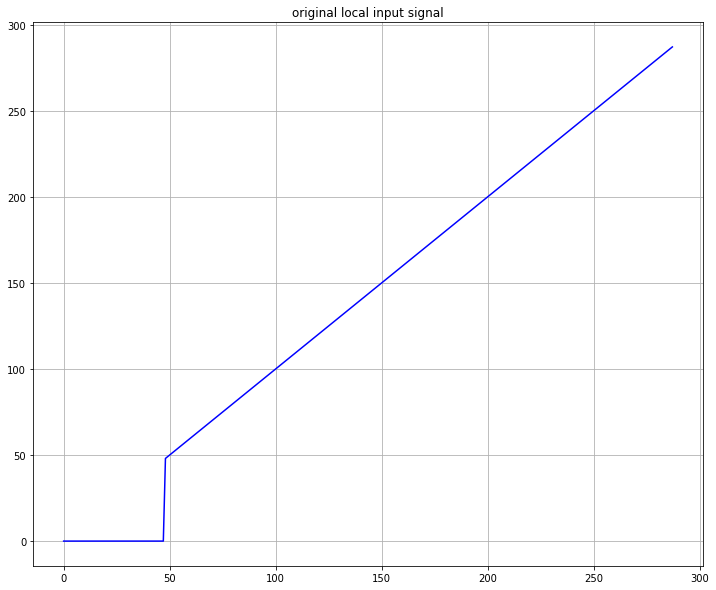

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [48]:
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt

local_input = []
for i in range(288):
    if i <48:
        i = 0
    local_input.append(i)    
#local_input = [
#    0, 0, 0, 0, 0, 0, 0, 0,
#    0, 0, 0, 0, 0, 0, 0, 0,
#    0, 0, 0, 0, 0, 0, 0, 0,
#    0, 0, 0, 0, 0, 0, 0, 0,
#    0, 0, 0, 0, 0, 0, 0, 0,
#    0, 0, 0, 0, 0, 0, 0, 0,
#    0, 0, 0, 0, 0, 0, 0, 0,
#    0, 0, 0, 0, 0, 0, 0, 0,
#    48,  49,  50,  51, 52,  53,  54,  55,  56,  57,  
#    58,  59,  60,  61,  62,  63,  64, 65,  66,  67, 
#    68,  69,  70,  71,  72,  73,  74,  75,  76, 77, 
#    78,  79,  80,  81,  82,  83,  84,  85,  86, 87,  
#    88,  89,  90, 91,  92,  93,  94,  95,  96,  97,
#    98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 
#    108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 
#    118, 119, 120, 121, 122, 123, 124, 125, 126, 127,  
#    48,  49,  50,  51, 52,  53,  54,  55,  56,  57,  
#    58,  59,  60,  61,  62,  63,  64, 65,  66,  67, 
#    68,  69,  70,  71,  72,  73,  74,  75,  76, 77, 
#    78,  79,  80,  81,  82,  83,  84,  85,  86, 87,  
#    88,  89,  90, 91,  92,  93,  94,  95,  96,  97,
#    98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 
#    108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 
#    118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 
#    48,  49,  50,  51, 52,  53,  54,  55,  56,  57,  
#    58,  59,  60,  61,  62,  63,  64, 65,  66,  67, 
#    68,  69,  70,  71,  72,  73,  74,  75,  76, 77, 
#    78,  79,  80,  81,  82,  83,  84,  85,  86, 87,  
#    88,  89,  90, 91,  92,  93,  94,  95,  96,  97,
#    98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 
#    108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 
#    118, 119, 120, 121, 122, 123, 124, 125, 126, 127 
#]
local_input = np.array(local_input)

fig = plt.figure(figsize=(12,10))
plt.title("original local input signal")
plt.plot(local_input[:], 'b')
#plt.plot(apollo_digital_filter_output, 'r')
#plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()

local_input

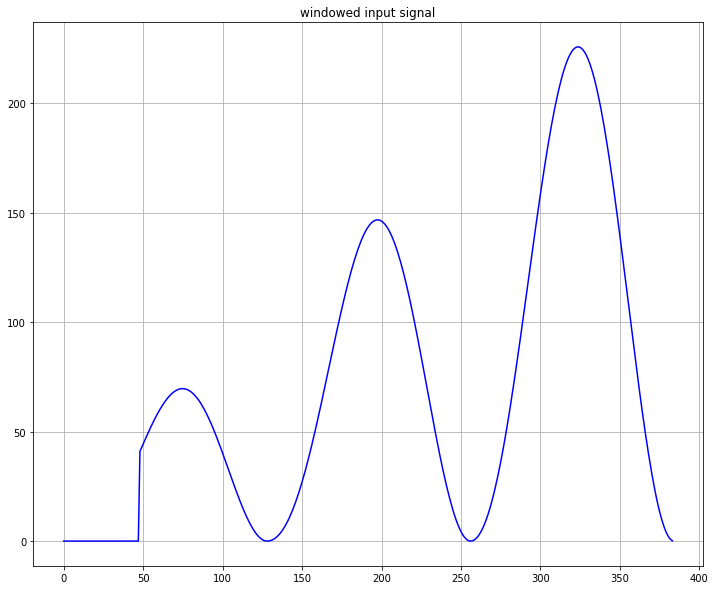

In [49]:
hop = 80
fft_len = window_length = 128 
fs =16000
syn_num = 3

actual_input_len = (syn_num-1)*hop + window_length

windowed_input_len = syn_num * window_length

# need unsymetrical window to reconstuct the original signal
# detail could be verified with NOLA check
hanning_window =signal.windows.hann(window_length, sym=False)

#hanning_window =np.hanning(window_length+1)[:-1]

hanning_window = np.around(hanning_window, decimals=6)

windowed_input = np.array([0]*windowed_input_len, dtype=float)

for indx in range(syn_num):
    for i in range(window_length):
        windowed_input[indx*window_length + i] = local_input[indx*hop + i] * hanning_window[i]

windowed_input = windowed_input / 1.
        
        
fig = plt.figure(figsize=(12,10))
plt.title("windowed input signal")
plt.plot(windowed_input[:], 'b')
#plt.plot(apollo_digital_filter_output, 'r')
#plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()

In [50]:
hanning_window

array([0.00000e+00, 6.02000e-04, 2.40800e-03, 5.41200e-03, 9.60700e-03,
       1.49840e-02, 2.15300e-02, 2.92280e-02, 3.80600e-02, 4.80050e-02,
       5.90390e-02, 7.11360e-02, 8.42650e-02, 9.83960e-02, 1.13495e-01,
       1.29524e-01, 1.46447e-01, 1.64221e-01, 1.82803e-01, 2.02150e-01,
       2.22215e-01, 2.42949e-01, 2.64302e-01, 2.86222e-01, 3.08658e-01,
       3.31555e-01, 3.54858e-01, 3.78510e-01, 4.02455e-01, 4.26635e-01,
       4.50991e-01, 4.75466e-01, 5.00000e-01, 5.24534e-01, 5.49009e-01,
       5.73365e-01, 5.97545e-01, 6.21490e-01, 6.45142e-01, 6.68445e-01,
       6.91342e-01, 7.13778e-01, 7.35698e-01, 7.57051e-01, 7.77785e-01,
       7.97850e-01, 8.17197e-01, 8.35779e-01, 8.53553e-01, 8.70476e-01,
       8.86505e-01, 9.01604e-01, 9.15735e-01, 9.28864e-01, 9.40961e-01,
       9.51995e-01, 9.61940e-01, 9.70772e-01, 9.78470e-01, 9.85016e-01,
       9.90393e-01, 9.94588e-01, 9.97592e-01, 9.99398e-01, 1.00000e+00,
       9.99398e-01, 9.97592e-01, 9.94588e-01, 9.90393e-01, 9.850

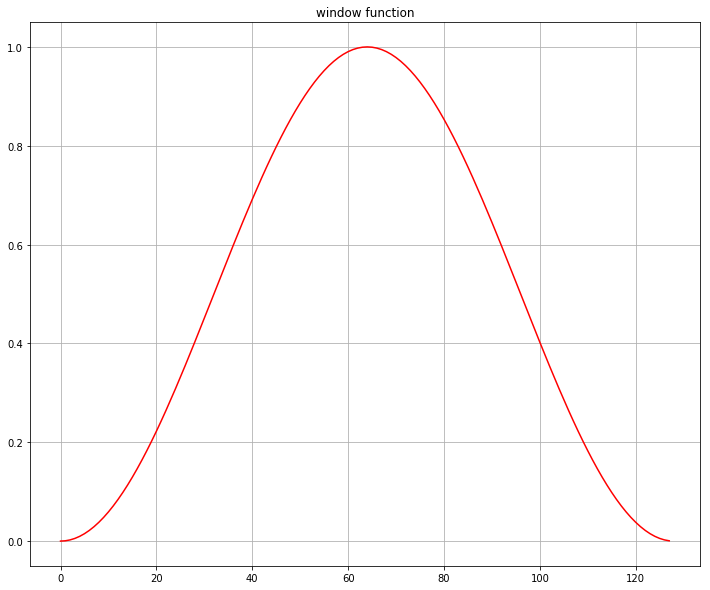

In [51]:
fig = plt.figure(figsize=(12,10))
plt.title("window function")
plt.plot(hanning_window, 'r')
#plt.plot(apollo_digital_filter_output, 'r')
#plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()

In [58]:
def stft(x, fftsize=128, hop=80):
    w = scipy.hanning(fftsize+1)[:-1]      # better reconstruction with this trick +1)[:-1]  
#    w = scipy.hanning(fftsize)
    return np.array([np.fft.rfft(w*x[i:i+fftsize]) for i in range(0, len(x)+1-fftsize, hop)])

def istft(X, fftsize=128 ,hop=80):
    w = scipy.hanning(fftsize+1)[:-1]      # better reconstruction with this trick +1)[:-1]
    x = scipy.zeros((X.shape[0]-1)*hop+fftsize)
    wsum = scipy.zeros((X.shape[0]-1)*hop+fftsize) 
    for n,i in enumerate(range(0, len(x)-fftsize+1, hop)):
#        print((np.fft.irfft(X[n])))
        x[i:i+fftsize] += scipy.real(np.fft.irfft(X[n])) * w   # overlap-add
        wsum[i:i+fftsize] += w ** 2.
    pos = wsum != 0
    x[pos] /= wsum[pos]
    return x

In [59]:
stft_result = stft(local_input)
stft_result

array([[ 3.53183165e+03+0.00000000e+00j, -1.91392353e+03+1.48173204e+03j,
         3.45990397e+02-4.45587733e+02j, -2.54884381e+02-2.02469494e+02j,
         2.40498187e+01+1.86805721e+02j,  1.10260354e+02-1.34897054e+02j,
        -1.38812969e+02-6.47886891e+00j,  7.92631933e+01+8.37440231e+01j,
         9.05471642e+00-1.05667554e+02j, -7.28388188e+01+5.45547225e+01j,
         8.17683031e+01+1.19471261e+01j, -4.21572826e+01-6.36127205e+01j,
        -1.54735592e+01+6.68007684e+01j,  5.52774571e+01-3.30249105e+01j,
        -5.72874498e+01-1.72266593e+01j,  2.53776495e+01+4.93471939e+01j,
         1.75844546e+01-4.97873785e+01j, -4.53561998e+01+1.97568836e+01j,
         4.33153305e+01+1.79475399e+01j, -1.57813166e+01-4.19786836e+01j,
        -1.85867770e+01+3.81689943e+01j,  3.88259993e+01-1.24592147e+01j,
        -3.41851311e+01-1.90085144e+01j,  9.43389841e+00+3.62128000e+01j,
         1.91149406e+01-3.07557376e+01j, -3.41560471e+01+6.90255532e+00j,
         2.76227473e+01+1.92219758e+01

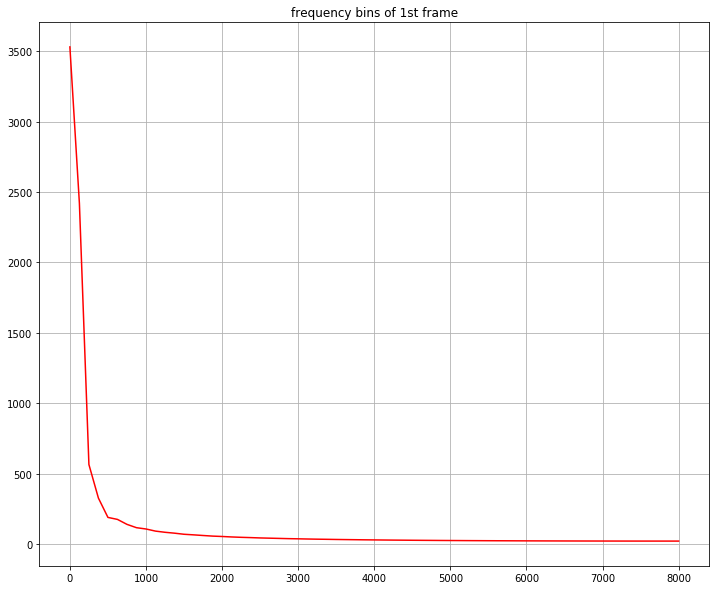

In [60]:
freq_indx = np.fft.rfftfreq(fft_len, d=1./fs)
fig = plt.figure(figsize=(12,10))
plt.title("frequency bins of 1st frame")
plt.plot(freq_indx, np.abs(stft_result[0]), 'r')
#plt.plot(apollo_digital_filter_output, 'r')
#plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()

In [61]:
weights_dspc_2cm = pd.read_csv("../beamforming/weights/weight_2cm.csv", header=None).values.astype(str).astype(np.complex)
weights_dspc_2cm = weights_dspc_2cm.T
freq_output_beamformed = np.zeros(np.shape(stft_result), dtype=np.complex)
for i in range(np.shape(stft_result)[0]):
    freq_output_beamformed[i,:] = stft_result[i, :] * weights_dspc_2cm[0, :]+ stft_result[i, :] * weights_dspc_2cm[1, :]
freq_output_beamformed

array([[ 3.53183165e+03+2.05708003e-01j, -1.58476108e+03+1.53484176e+03j,
         2.50606822e+02-3.39212132e+02j, -1.58453671e+02-1.22834231e+02j,
         1.35928016e+01+9.89436414e+01j,  5.19931135e+01-6.46841802e+01j,
        -6.13367352e+01-2.27850756e+00j,  3.36038412e+01+3.46647942e+01j,
         2.95092048e+00-4.26353320e+01j, -2.80876302e+01+2.19807391e+01j,
         3.15035316e+01+3.80958336e+00j, -1.66283722e+01-2.35992155e+01j,
        -4.98472823e+00+2.51658300e+01j,  2.00565725e+01-1.29951850e+01j,
        -2.13768332e+01-5.50986057e+00j,  1.01126974e+01+1.77144447e+01j,
         5.57702301e+00-1.85412113e+01j, -1.62522475e+01+8.00914807e+00j,
         1.61523877e+01+5.81416540e+00j, -6.57486360e+00-1.50576334e+01j,
        -6.06632123e+00+1.43435788e+01j,  1.40015771e+01-5.34400441e+00j,
        -1.29642949e+01-6.29217055e+00j,  4.25737092e+00+1.31552697e+01j,
         6.41065597e+00-1.17943926e+01j, -1.25312874e+01+3.32521987e+00j,
         1.07423403e+01+6.52825154e+00

In [64]:
syn_result = istft(freq_output_beamformed)

syn_result

array([ 0.00000000e+00,  7.20955004e+03,  1.64352866e+03,  6.67737543e+02,
        3.41236861e+02,  1.98528303e+02,  1.24290147e+02,  8.23279021e+01,
        5.61617582e+01,  3.95184436e+01,  2.80232625e+01,  2.02573698e+01,
        1.44245502e+01,  1.03749046e+01,  7.20420620e+00,  4.94124060e+00,
        3.13537816e+00,  1.85848052e+00,  7.82316045e-01,  4.93038570e-02,
       -5.85504450e-01, -9.80206816e-01, -1.33402209e+00, -1.49939836e+00,
       -1.66126005e+00, -1.66243463e+00, -1.68819264e+00, -1.56507206e+00,
       -1.48976051e+00, -1.26367982e+00, -1.08226641e+00, -7.54185863e-01,
       -4.79143967e-01, -3.31282873e-02,  3.36350441e-01,  9.11641977e-01,
        1.38155953e+00,  2.11027658e+00,  2.70647785e+00,  3.63321775e+00,
        4.34402273e+00,  5.57414304e+00,  6.41317979e+00,  8.00907862e+00,
        8.93496807e+00,  1.10986104e+01,  1.21831917e+01,  1.32946971e+01,
        3.27698649e+01,  3.54993855e+01,  3.68905644e+01,  3.93599057e+01,
        4.08023563e+01,  

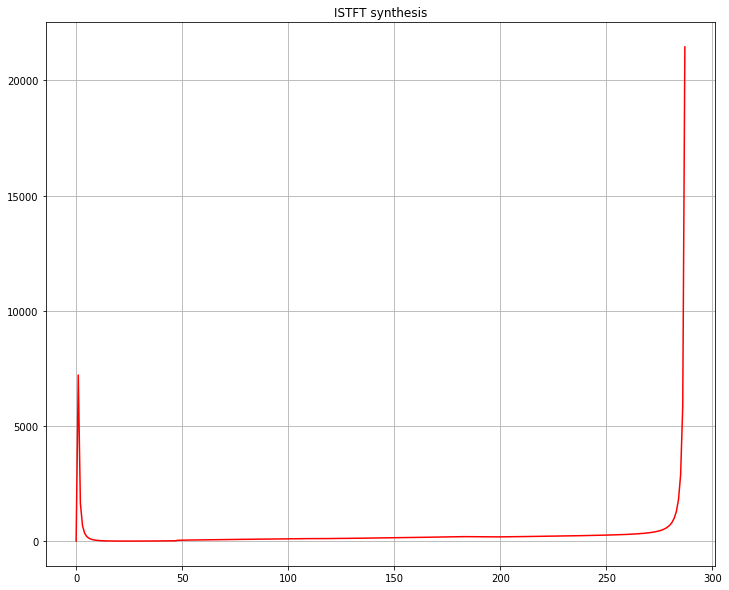

In [63]:
fig = plt.figure(figsize=(12,10))
plt.title("ISTFT synthesis")
plt.plot(syn_result, 'r')
#plt.plot(apollo_digital_filter_output, 'r')
#plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()

Scipy ref code 

In [10]:
test_frame = local_input[:288]

f, t, sp_matx = signal.stft(test_frame, fs, window='hann',nperseg=128, noverlap=48,boundary=None,\
                            return_onesided=True)

In [11]:
t, sp_out = signal.istft(sp_matx, fs=16000, window='hann', nperseg=128, noverlap=48, \
                         boundary=None, input_onesided=True)

/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1446: UserWarning: NOLA condition failed, STFT may not be invertible
  warnings.warn("NOLA condition failed, STFT may not be invertible")


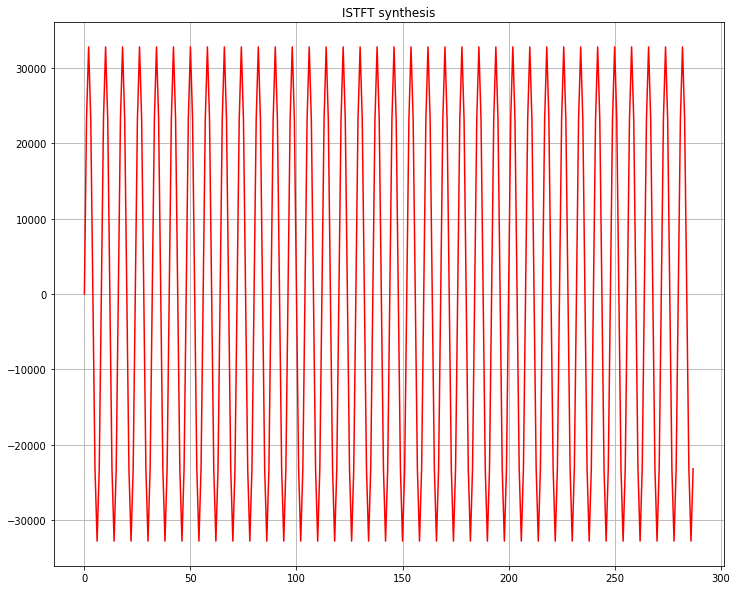

In [12]:
fig = plt.figure(figsize=(12,10))
plt.title("ISTFT synthesis")
plt.plot(sp_out, 'r')
#plt.plot(apollo_digital_filter_output, 'r')
#plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()

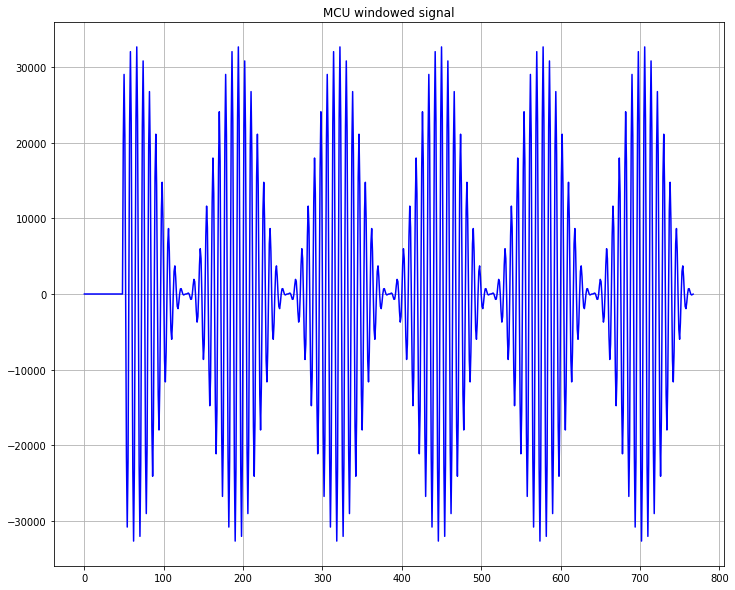

In [36]:
mcu_windowed_signal = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 20168.058594, 29048.109375, 20889.263672, 0.0, -21520.849609, -30832.468750, -22056.773438,
0.0, 22491.816406, 32061.527344, 22821.835938, 0.0, -23043.609375, -32688.095703, -23155.052734,
0.0, 23155.052734, 32688.095703, 23043.609375, 0.0, -22821.835938, -32061.527344, -22491.816406,
0.0, 22056.773438, 30832.468750, 21520.849609, 0.0, -20889.263672, -29048.109375, -20168.058594,
0.0, 19364.164063, 26777.095703, 18485.386719, 0.0, -17540.115234, -24106.615234, -16537.523438,
0.0, 15487.202148, 21139.369141, 14399.301758, 0.0, -13284.292969, -17989.378906, -12152.927734,
0.0, 11016.072266, 14777.622070, 9884.706055, 0.0, -8769.698242, -11627.632813, -7681.797852,
0.0, 6631.477539, 8660.382813, 5628.885254, 0.0, -4683.613281, -5989.906250, -3804.836426,
0.0, 3000.941650, 3718.890625, 2279.737061, 0.0, -1648.149902, -1934.530884, -1112.227783,
0.0, 677.183533, 705.473511, 347.164276, 0.0, -125.390633, -78.902931, -13.947738,
0.0, 13.947738, 78.902931, 125.390633, 0.0, -347.164276, -705.473511, -677.183533,
0.0, 1112.227783, 1934.530884, 1648.149902, 0.0, -2279.737061, -3718.890625, -3000.941650,
0.0, 3804.836426, 5989.906250, 4683.613281, 0.0, -5628.885254, -8660.382813, -6631.477539,
0.0, 7681.797852, 11627.632813, 8769.698242, 0.0, -9884.706055, -14777.622070, -11016.072266,
0.0, 12152.927734, 17989.378906, 13284.292969, 0.0, -14399.301758, -21139.369141, -15487.202148,
0.0, 16537.523438, 24106.615234, 17540.115234, 0.0, -18485.386719, -26777.095703, -19364.164063,
0.0, 20168.058594, 29048.109375, 20889.263672, 0.0, -21520.849609, -30832.468750, -22056.773438,
0.0, 22491.816406, 32061.527344, 22821.835938, 0.0, -23043.609375, -32688.095703, -23155.052734,
0.0, 23155.052734, 32688.095703, 23043.609375, 0.0, -22821.835938, -32061.527344, -22491.816406,
0.0, 22056.773438, 30832.468750, 21520.849609, 0.0, -20889.263672, -29048.109375, -20168.058594,
0.0, 19364.164063, 26777.095703, 18485.386719, 0.0, -17540.115234, -24106.615234, -16537.523438,
0.0, 15487.202148, 21139.369141, 14399.301758, 0.0, -13284.292969, -17989.378906, -12152.927734,
0.0, 11016.072266, 14777.622070, 9884.706055, 0.0, -8769.698242, -11627.632813, -7681.797852,
0.0, 6631.477539, 8660.382813, 5628.885254, 0.0, -4683.613281, -5989.906250, -3804.836426,
0.0, 3000.941650, 3718.890625, 2279.737061, 0.0, -1648.149902, -1934.530884, -1112.227783,
0.0, 677.183533, 705.473511, 347.164276, 0.0, -125.390633, -78.902931, -13.947738,
0.0, 13.947738, 78.902931, 125.390633, 0.0, -347.164276, -705.473511, -677.183533,
0.0, 1112.227783, 1934.530884, 1648.149902, 0.0, -2279.737061, -3718.890625, -3000.941650,
0.0, 3804.836426, 5989.906250, 4683.613281, 0.0, -5628.885254, -8660.382813, -6631.477539,
0.0, 7681.797852, 11627.632813, 8769.698242, 0.0, -9884.706055, -14777.622070, -11016.072266,
0.0, 12152.927734, 17989.378906, 13284.292969, 0.0, -14399.301758, -21139.369141, -15487.202148,
0.0, 16537.523438, 24106.615234, 17540.115234, 0.0, -18485.386719, -26777.095703, -19364.164063,
0.0, 20168.058594, 29048.109375, 20889.263672, 0.0, -21520.849609, -30832.468750, -22056.773438,
0.0, 22491.816406, 32061.527344, 22821.835938, 0.0, -23043.609375, -32688.095703, -23155.052734,
0.0, 23155.052734, 32688.095703, 23043.609375, 0.0, -22821.835938, -32061.527344, -22491.816406,
0.0, 22056.773438, 30832.468750, 21520.849609, 0.0, -20889.263672, -29048.109375, -20168.058594,
0.0, 19364.164063, 26777.095703, 18485.386719, 0.0, -17540.115234, -24106.615234, -16537.523438,
0.0, 15487.202148, 21139.369141, 14399.301758, 0.0, -13284.292969, -17989.378906, -12152.927734,
0.0, 11016.072266, 14777.622070, 9884.706055, 0.0, -8769.698242, -11627.632813, -7681.797852,
0.0, 6631.477539, 8660.382813, 5628.885254, 0.0, -4683.613281, -5989.906250, -3804.836426,
0.0, 3000.941650, 3718.890625, 2279.737061, 0.0, -1648.149902, -1934.530884, -1112.227783,
0.0, 677.183533, 705.473511, 347.164276, 0.0, -125.390633, -78.902931, -13.947738,
0.0, 13.947738, 78.902931, 125.390633, 0.0, -347.164276, -705.473511, -677.183533,
0.0, 1112.227783, 1934.530884, 1648.149902, 0.0, -2279.737061, -3718.890625, -3000.941650,
0.0, 3804.836426, 5989.906250, 4683.613281, 0.0, -5628.885254, -8660.382813, -6631.477539,
0.0, 7681.797852, 11627.632813, 8769.698242, 0.0, -9884.706055, -14777.622070, -11016.072266,
0.0, 12152.927734, 17989.378906, 13284.292969, 0.0, -14399.301758, -21139.369141, -15487.202148,
0.0, 16537.523438, 24106.615234, 17540.115234, 0.0, -18485.386719, -26777.095703, -19364.164063,
0.0, 20168.058594, 29048.109375, 20889.263672, 0.0, -21520.849609, -30832.468750, -22056.773438,
0.0, 22491.816406, 32061.527344, 22821.835938, 0.0, -23043.609375, -32688.095703, -23155.052734,
0.0, 23155.052734, 32688.095703, 23043.609375, 0.0, -22821.835938, -32061.527344, -22491.816406,
0.0, 22056.773438, 30832.468750, 21520.849609, 0.0, -20889.263672, -29048.109375, -20168.058594,
0.0, 19364.164063, 26777.095703, 18485.386719, 0.0, -17540.115234, -24106.615234, -16537.523438,
0.0, 15487.202148, 21139.369141, 14399.301758, 0.0, -13284.292969, -17989.378906, -12152.927734,
0.0, 11016.072266, 14777.622070, 9884.706055, 0.0, -8769.698242, -11627.632813, -7681.797852,
0.0, 6631.477539, 8660.382813, 5628.885254, 0.0, -4683.613281, -5989.906250, -3804.836426,
0.0, 3000.941650, 3718.890625, 2279.737061, 0.0, -1648.149902, -1934.530884, -1112.227783,
0.0, 677.183533, 705.473511, 347.164276, 0.0, -125.390633, -78.902931, -13.947738,
0.0, 13.947738, 78.902931, 125.390633, 0.0, -347.164276, -705.473511, -677.183533,
0.0, 1112.227783, 1934.530884, 1648.149902, 0.0, -2279.737061, -3718.890625, -3000.941650,
0.0, 3804.836426, 5989.906250, 4683.613281, 0.0, -5628.885254, -8660.382813, -6631.477539,
0.0, 7681.797852, 11627.632813, 8769.698242, 0.0, -9884.706055, -14777.622070, -11016.072266,
0.0, 12152.927734, 17989.378906, 13284.292969, 0.0, -14399.301758, -21139.369141, -15487.202148,
0.0, 16537.523438, 24106.615234, 17540.115234, 0.0, -18485.386719, -26777.095703, -19364.164063,
0.0, 20168.058594, 29048.109375, 20889.263672, 0.0, -21520.849609, -30832.468750, -22056.773438,
0.0, 22491.816406, 32061.527344, 22821.835938, 0.0, -23043.609375, -32688.095703, -23155.052734,
0.0, 23155.052734, 32688.095703, 23043.609375, 0.0, -22821.835938, -32061.527344, -22491.816406,
0.0, 22056.773438, 30832.468750, 21520.849609, 0.0, -20889.263672, -29048.109375, -20168.058594,
0.0, 19364.164063, 26777.095703, 18485.386719, 0.0, -17540.115234, -24106.615234, -16537.523438,
0.0, 15487.202148, 21139.369141, 14399.301758, 0.0, -13284.292969, -17989.378906, -12152.927734,
0.0, 11016.072266, 14777.622070, 9884.706055, 0.0, -8769.698242, -11627.632813, -7681.797852,
0.0, 6631.477539, 8660.382813, 5628.885254, 0.0, -4683.613281, -5989.906250, -3804.836426,
0.0, 3000.941650, 3718.890625, 2279.737061, 0.0, -1648.149902, -1934.530884, -1112.227783,
0.0, 677.183533, 705.473511, 347.164276, 0.0, -125.390633, -78.902931, -13.947738,
0.0, 13.947738, 78.902931, 125.390633, 0.0, -347.164276, -705.473511, -677.183533,
0.0, 1112.227783, 1934.530884, 1648.149902, 0.0, -2279.737061, -3718.890625, -3000.941650,
0.0, 3804.836426, 5989.906250, 4683.613281, 0.0, -5628.885254, -8660.382813, -6631.477539,
0.0, 7681.797852, 11627.632813, 8769.698242, 0.0, -9884.706055, -14777.622070, -11016.072266,
0.0, 12152.927734, 17989.378906, 13284.292969, 0.0, -14399.301758, -21139.369141, -15487.202148,
0.0, 16537.523438, 24106.615234, 17540.115234, 0.0, -18485.386719, -26777.095703, -19364.164063,
0.0, 20168.058594, 29048.109375, 20889.263672, 0.0, -21520.849609, -30832.468750, -22056.773438,
0.0, 22491.816406, 32061.527344, 22821.835938, 0.0, -23043.609375, -32688.095703, -23155.052734,
0.0, 23155.052734, 32688.095703, 23043.609375, 0.0, -22821.835938, -32061.527344, -22491.816406,
0.0, 22056.773438, 30832.468750, 21520.849609, 0.0, -20889.263672, -29048.109375, -20168.058594,
0.0, 19364.164063, 26777.095703, 18485.386719, 0.0, -17540.115234, -24106.615234, -16537.523438,
0.0, 15487.202148, 21139.369141, 14399.301758, 0.0, -13284.292969, -17989.378906, -12152.927734,
0.0, 11016.072266, 14777.622070, 9884.706055, 0.0, -8769.698242, -11627.632813, -7681.797852,
0.0, 6631.477539, 8660.382813, 5628.885254, 0.0, -4683.613281, -5989.906250, -3804.836426,
0.0, 3000.941650, 3718.890625, 2279.737061, 0.0, -1648.149902, -1934.530884, -1112.227783,
0.0, 677.183533, 705.473511, 347.164276, 0.0, -125.390633, -78.902931, -13.947738]

mcu_windowed_signal = np.array(mcu_windowed_signal)

fig = plt.figure(figsize=(12,10))
plt.title("MCU windowed signal")
plt.plot(mcu_windowed_signal, 'b')
#plt.plot(apollo_digital_filter_output, 'r')
#plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()

In [14]:
stft_result = np.fft.rfft(mcu_windowed_signal)

stft_result = np.around(stft_result, decimals=6)


480


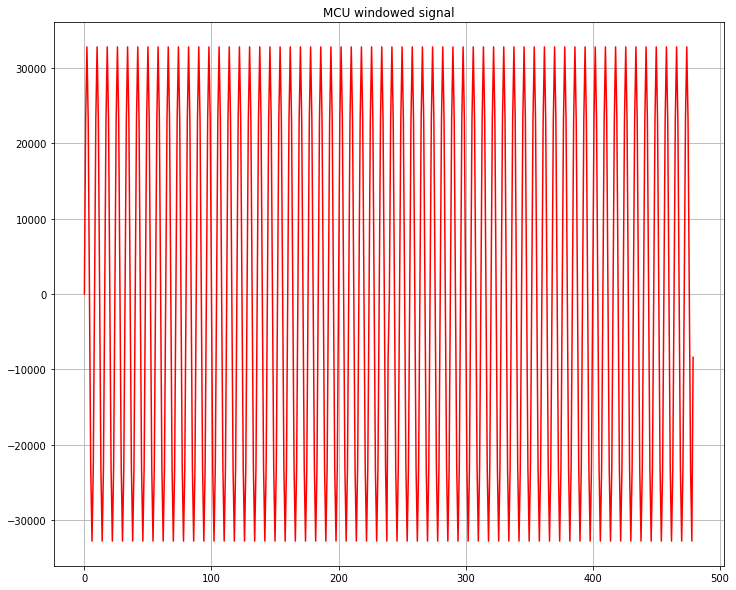

In [53]:
mcu_istft_result =[0, 23168, 32767, 23168, 0, -23168, -32767, -23169,
0, 23169, 32766, 23168, 0, -23168, -32767, -23168,
0, 23169, 32767, 23168, 0, -23168, -32767, -23168,
0, 23169, 32766, 23168, 0, -23168, -32767, -23168,
0, 23168, 32767, 23168, 0, -23168, -32766, -23169,
0, 23169, 32766, 23168, 0, -23168, -32766, -23168,
0, 23169, 32767, 23168, 0, -23169, -32767, -23168,
0, 23169, 32766, 23168, 0, -23169, -32766, -23169,
0, 23168, 32767, 23169, 0, -23169, -32767, -23169,
0, 23169, 32767, 23169, 0, -23168, -32767, -23169,
0, 23169, 32766, 23169, 0, -23168, -32766, -23169,
0, 23169, 32767, 23169, 0, -23168, -32767, -23169,
0, 23169, 32767, 23169, 0, -23169, -32767, -23169,
0, 23169, 32766, 23169, 0, -23168, -32767, -23169,
0, 23169, 32767, 23169, 0, -23169, -32767, -23169,
0, 23169, 32766, 23169, 0, -23169, -32767, -23168,
0, 23169, 32766, 23169, 0, -23169, -32766, -23168,
0, 23168, 32767, 23168, 0, -23169, -32766, -23169,
0, 23168, 32767, 23169, 0, -23169, -32767, -23169,
0, 23169, 32767, 23169, 0, -23168, -32767, -23169,
0, 23169, 32766, 23169, 0, -23168, -32766, -23169,
0, 23169, 32767, 23169, 0, -23168, -32767, -23169,
0, 23169, 32767, 23169, 0, -23169, -32767, -23169,
0, 23169, 32766, 23169, 0, -23168, -32767, -23169,
0, 23169, 32767, 23169, 0, -23169, -32767, -23168,
0, 23169, 32766, 23169, 0, -23169, -32766, -23168,
0, 23169, 32766, 23169, 0, -23169, -32766, -23168,
0, 23169, 32766, 23168, 0, -23169, -32766, -23168,
0, 23169, 32767, 23168, 0, -23169, -32767, -23168,
0, 23169, 32766, 23168, 0, -23169, -32767, -8395,
0, 23169, 32766, 23169, 0, -23168, -32766, -23169,
0, 23169, 32767, 23169, 0, -23168, -32767, -23169,
0, 23169, 32767, 23169, 0, -23169, -32767, -23169,
0, 23169, 32766, 23169, 0, -23168, -32767, -23169,
0, 23169, 32767, 23169, 0, -23169, -32767, -23169,
0, 23169, 32766, 23169, 0, -23169, -32767, -23168,
0, 23169, 32766, 23169, 0, -23169, -32766, -23168,
0, 23168, 32767, 23168, 0, -23169, -32766, -23169,
0, 23168, 32767, 23169, 0, -23169, -32767, -23169,
0, 23169, 32767, 23169, 0, -23168, -32767, -23169,
0, 23169, 32766, 23169, 0, -23168, -32766, -23169,
0, 23169, 32767, 23169, 0, -23168, -32767, -23169,
0, 23169, 32767, 23169, 0, -23169, -32767, -23169,
0, 23169, 32766, 23169, 0, -23168, -32767, -23169,
0, 23169, 32767, 23169, 0, -23169, -32767, -23169,
0, 23169, 32766, 23169, 0, -23169, -32767, -23168,
0, 23169, 32766, 23169, 0, -23169, -32766, -23168,
0, 23168, 32767, 23168, 0, -23169, -32766, -23169,
0, 23168, 32767, 23169, 0, -23169, -32767, -23169,
0, 23169, 32767, 23169, 0, -23168, -32767, -23169,
0, 23169, 32766, 23169, 0, -23168, -32766, -23169,
0, 23169, 32767, 23169, 0, -23168, -32767, -23169,
0, 23169, 32767, 23169, 0, -23169, -32767, -23169,
0, 23169, 32766, 23169, 0, -23168, -32767, -23169,
0, 23169, 32767, 23169, 0, -23169, -32767, -23168,
0, 23169, 32766, 23169, 0, -23169, -32766, -23168,
0, 23169, 32766, 23169, 0, -23169, -32766, -23168,
0, 23169, 32766, 23168, 0, -23169, -32766, -23168,
0, 23169, 32767, 23168, 0, -23169, -32767, -23168,
0, 23169, 32766, 23168, 0, -23169, -32767, -8395,]

mcu_istft_result = np.array(mcu_istft_result)

print(len(mcu_istft_result))
fig = plt.figure(figsize=(12,10))
plt.title("MCU windowed signal")
plt.plot(mcu_istft_result[:], 'r')
#plt.plot(apollo_digital_filter_output, 'r')
#plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()

768

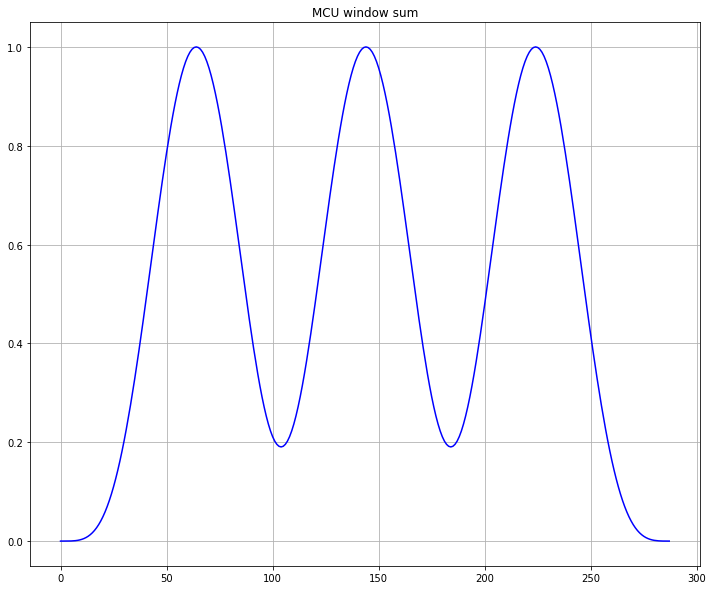

In [65]:
mcu_window_sum =[0.0, 0.000000, 0.000006, 0.000029,
0.000092, 0.000224, 0.000463, 0.000854,
0.001449, 0.002304, 0.003486, 0.005060,
0.007101, 0.009682, 0.012881, 0.016776,
0.021447, 0.026969, 0.033417, 0.040865,
0.049379, 0.059024, 0.069856, 0.081923,
0.095270, 0.109929, 0.125924, 0.143270,
0.161970, 0.182017, 0.203393, 0.226068,
0.250000, 0.275136, 0.301411, 0.328747,
0.357060, 0.386250, 0.416208, 0.446819,
0.477954, 0.509479, 0.541252, 0.573126,
0.604950, 0.636565, 0.667811, 0.698527,
0.728553, 0.757728, 0.785891, 0.812890,
0.838571, 0.862788, 0.885408, 0.906295,
0.925329, 0.942398, 0.957404, 0.970257,
0.980878, 0.989205, 0.995190, 0.998796,
1.0, 0.998796, 0.995190, 0.989205,
0.980878, 0.970257, 0.957404, 0.942398,
0.925329, 0.906295, 0.885408, 0.862788,
0.838571, 0.812890, 0.785891, 0.757728,
0.728553, 0.698527, 0.667817, 0.636594,
0.605042, 0.573351, 0.541715, 0.510333,
0.479402, 0.449123, 0.419694, 0.391310,
0.364161, 0.338429, 0.314292, 0.291912,
0.271447, 0.253036, 0.236810, 0.222882,
0.211350, 0.202294, 0.195780, 0.191852,
0.190539, 0.191852, 0.195780, 0.202294,
0.211350, 0.222882, 0.236810, 0.253036,
0.271447, 0.291912, 0.314292, 0.338429,
0.364161, 0.391310, 0.419694, 0.449123,
0.479402, 0.510333, 0.541715, 0.573351,
0.605042, 0.636594, 0.667817, 0.698527,
0.728553, 0.757728, 0.785891, 0.812890,
0.838571, 0.862788, 0.885408, 0.906295,
0.925329, 0.942398, 0.957404, 0.970257,
0.980878, 0.989205, 0.995190, 0.998796,
1.0, 0.998796, 0.995190, 0.989205,
0.980878, 0.970257, 0.957404, 0.942398,
0.925329, 0.906295, 0.885408, 0.862788,
0.838571, 0.812890, 0.785891, 0.757728,
0.728553, 0.698527, 0.667817, 0.636594,
0.605042, 0.573351, 0.541715, 0.510333,
0.479402, 0.449123, 0.419694, 0.391310,
0.364161, 0.338429, 0.314292, 0.291912,
0.271447, 0.253036, 0.236810, 0.222882,
0.211350, 0.202294, 0.195780, 0.191852,
0.190539, 0.191852, 0.195780, 0.202294,
0.211350, 0.222882, 0.236810, 0.253036,
0.271447, 0.291912, 0.314292, 0.338429,
0.364161, 0.391310, 0.419694, 0.449123,
0.479402, 0.510333, 0.541715, 0.573351,
0.605042, 0.636594, 0.667817, 0.698527,
0.728553, 0.757728, 0.785891, 0.812890,
0.838571, 0.862788, 0.885408, 0.906295,
0.925329, 0.942398, 0.957404, 0.970257,
0.980878, 0.989205, 0.995190, 0.998796,
1.0, 0.998796, 0.995190, 0.989205,
0.980878, 0.970257, 0.957404, 0.942398,
0.925329, 0.906295, 0.885408, 0.862788,
0.838571, 0.812890, 0.785891, 0.757728,
0.728553, 0.698527, 0.667811, 0.636565,
0.604950, 0.573126, 0.541252, 0.509479,
0.477954, 0.446819, 0.416208, 0.386250,
0.357060, 0.328747, 0.301411, 0.275136,
0.250000, 0.226068, 0.203393, 0.182017,
0.161970, 0.143270, 0.125924, 0.109929,
0.095270, 0.081923, 0.069856, 0.059024,
0.049379, 0.040865, 0.033417, 0.026969,
0.021447, 0.016776, 0.012881, 0.009682,
0.007101, 0.005060, 0.003486, 0.002304,
0.001449, 0.000854, 0.000463, 0.000224,
0.000092, 0.000029, 0.000006, 0.000000]

mcu_istft_result = np.array(mcu_window_sum)

fig = plt.figure(figsize=(12,10))
plt.title("MCU window sum")
plt.plot(mcu_window_sum, 'b')
#plt.plot(apollo_digital_filter_output, 'r')
#plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()

In [66]:
print(mcu_window_sum[80:207])

[0.728553, 0.698527, 0.667817, 0.636594, 0.605042, 0.573351, 0.541715, 0.510333, 0.479402, 0.449123, 0.419694, 0.39131, 0.364161, 0.338429, 0.314292, 0.291912, 0.271447, 0.253036, 0.23681, 0.222882, 0.21135, 0.202294, 0.19578, 0.191852, 0.190539, 0.191852, 0.19578, 0.202294, 0.21135, 0.222882, 0.23681, 0.253036, 0.271447, 0.291912, 0.314292, 0.338429, 0.364161, 0.39131, 0.419694, 0.449123, 0.479402, 0.510333, 0.541715, 0.573351, 0.605042, 0.636594, 0.667817, 0.698527, 0.728553, 0.757728, 0.785891, 0.81289, 0.838571, 0.862788, 0.885408, 0.906295, 0.925329, 0.942398, 0.957404, 0.970257, 0.980878, 0.989205, 0.99519, 0.998796, 1.0, 0.998796, 0.99519, 0.989205, 0.980878, 0.970257, 0.957404, 0.942398, 0.925329, 0.906295, 0.885408, 0.862788, 0.838571, 0.81289, 0.785891, 0.757728, 0.728553, 0.698527, 0.667817, 0.636594, 0.605042, 0.573351, 0.541715, 0.510333, 0.479402, 0.449123, 0.419694, 0.39131, 0.364161, 0.338429, 0.314292, 0.291912, 0.271447, 0.253036, 0.23681, 0.222882, 0.21135, 0.202294,

In [17]:
mcu_stft_result = np.array([0.0, 0.0-0.009790j, -0.031532+0.0j, -0.011507+0.000098j, 
      0.088435+0.0j, 0.0-0.000812j, -0.123259+0.0j, -0.001016+0.007843j, 
      0.050171+0.0j, 0.0-0.002572j, -0.074436+0.0j, 0.007885-0.002339j, 
      -0.266794+0.0j, 0.0-0.004721j, -0.072441+0.0j, 0.006054-0.007813j, 
      524263.437500+0.0j, -1048526.625000+0.015625j, 524263.250000+0.0j, 0.001784+0.005095j, 
      0.053459+0.0j, 0.0+0.002998j, 0.033850+0.0j, 0.005281-0.006240j, 
      -0.022228+0.0j, 0.0-0.003740j, -0.087802+0.0j, 0.004270+0.001090j, 
      -0.041014+0.0j, 0.0+0.005540j, 0.154479+0.0j, -0.010965+0.005041j, 
      0.110074+0.0j, 0.0-0.019201j, 0.063199+0.0j, 0.006009+0.000498j, 
      -0.200293+0.0j, 0.0+0.001848j, 0.200529+0.0j, 0.002620-0.010712j, 
      -0.083001+0.0j, 0.0+0.008695j, 0.075538+0.0j, -0.003013-0.001946j, 
      0.261612+0.0j, 0.0-0.001630j, 0.087421+0.0j, -0.009558-0.015625j,
      -8.640625+0.0j, 17.375000+0.007813j, -8.492188+0.0j, -0.005288+0.001256j,
      -0.038478+0.0j, 0.0+0.001287j, -0.039033+0.0j, -0.000409+0.000116j, 
      0.023330+0.0j, 0.0+0.006610j, 0.054973+0.0j, -0.002666-0.002125j, 
      0.118284+0.0j, 0.0-0.006136j, -0.266337+0.0j, 0.005468+0.011255j, -0.078407+0j], dtype=complex)

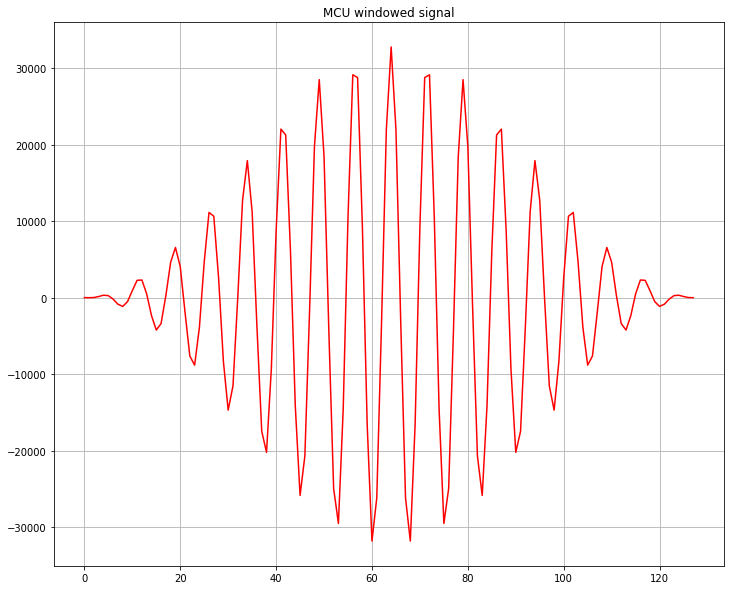

In [18]:
istft_ret = np.fft.irfft(mcu_stft_result)
fig = plt.figure(figsize=(12,10))
plt.title("MCU windowed signal")
plt.plot(istft_ret, 'r')
#plt.plot(apollo_digital_filter_output, 'r')
#plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()